# Voting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

### 데이터 준비

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
#iris['data']

In [11]:
#iris['DESCR']

In [14]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
type(iris['target'])

numpy.ndarray

In [16]:
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# 결측치

# 중복치

### 학습셋 분리

In [41]:
X = df.drop(['target'], axis=1)
y = df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y,
                                                   random_state=2022)
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [43]:
# 정규화

# 트리 베이스 모델은 정규화를 하지 않아도 됨
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)

X_train = scaler.fit_transform(X_train)
X_train[:5]

array([[ 0.74198233, -0.32371562,  0.33532535,  0.13579779],
       [ 0.24176952, -1.91389762,  0.73771577,  0.39652954],
       [-0.00833688, -0.77805333,  0.10538797,  0.00543191],
       [ 1.11714194, -0.09654676,  0.85268446,  1.43945654],
       [-0.50854969,  1.94797295, -1.15926764, -1.03749509]])

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

clf1 = KNeighborsClassifier()
clf2 = SVC()
clf3 = DecisionTreeClassifier()

clf = VotingClassifier(
    estimators = [('knn', clf1), ('svc', clf2),('tree', clf3)],
    voting='hard',
    weights=[1, 1, 1]    #가중치
)

In [45]:
clf.fit(X_train, y_train)  #학습완료

VotingClassifier(estimators=[('knn', KNeighborsClassifier()), ('svc', SVC()),
                             ('tree', DecisionTreeClassifier())],
                 weights=[1, 1, 1])

In [46]:
clf.score(X_train, y_train)

0.9916666666666667

In [ ]:
### 테스트 스코어

In [47]:
X_test = scaler.transform(X_test)
y_test = y_test.values

In [50]:
y_pred = clf.predict(X_test)
y_pred[:5]

array([2, 0, 2, 1, 0])

In [55]:
my.print_score(y_test, y_pred)

accuraccy: 0.9333333333333333
precision: 0.9444444444444445
recall: 0.9333333333333332


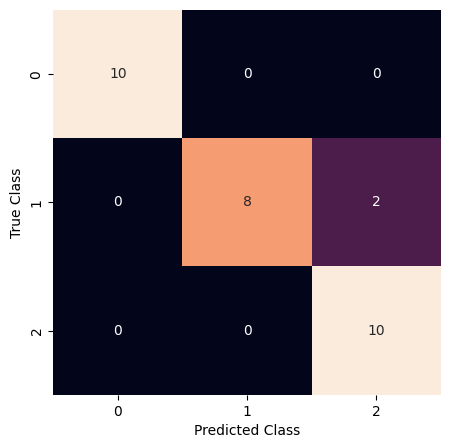

In [52]:
my.plot_confusion_matrix(y_test, y_pred)